In [1]:
import math
import numpy as np
import torch
import torchvision.utils
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity

from CS_mask import cartesian_mask
from helper_fn import imsshow

In [2]:
dataset = np.load('./cine.npz')['dataset']
# Index of cine img to process
CINE_INDEX = 12

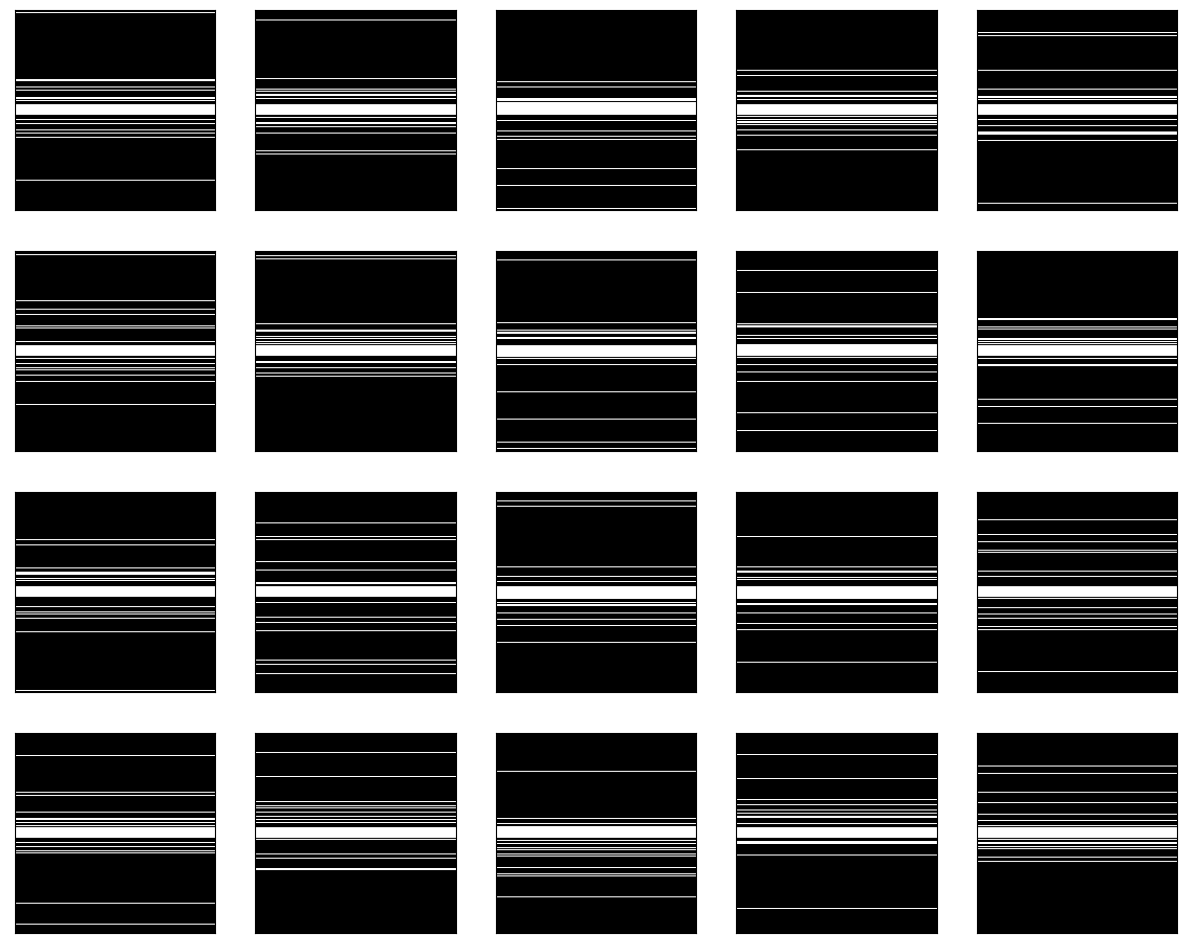

In [3]:
imgs = dataset[CINE_INDEX]
mask = cartesian_mask(shape=(1, 20, 192, 192), acc=8, sample_n=10, centred=True)
imsshow(mask[0, :, :, :], num_col=5, cmap='gray')

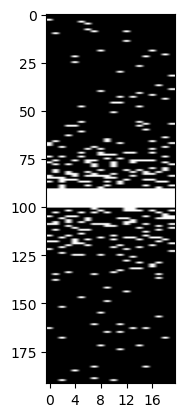

In [4]:
# To get the first column of each image, use indexing with ':,0,0'
# Squeeze the third dimension to get a 20*192 matrix
mask_get_ky = mask[0, :, :, 0:1]
squeezed_matrix = np.squeeze(mask_get_ky, axis=2)
# Transpose the result to get a 192*20 matrix
result_matrix = np.transpose(squeezed_matrix) # [20, 192, 1]
# Transpose the result to get a 192*20 matrix
plt.imshow(result_matrix, aspect=0.3, cmap='gray')
plt.xticks(np.arange(0, 20, 4))
plt.show()


In [5]:
images = dataset[CINE_INDEX]
k_space = np.fft.fft2(images)
k_space_shifted = np.fft.fftshift(k_space)

In [6]:
sampled = k_space_shifted * mask[0, :, :, :]

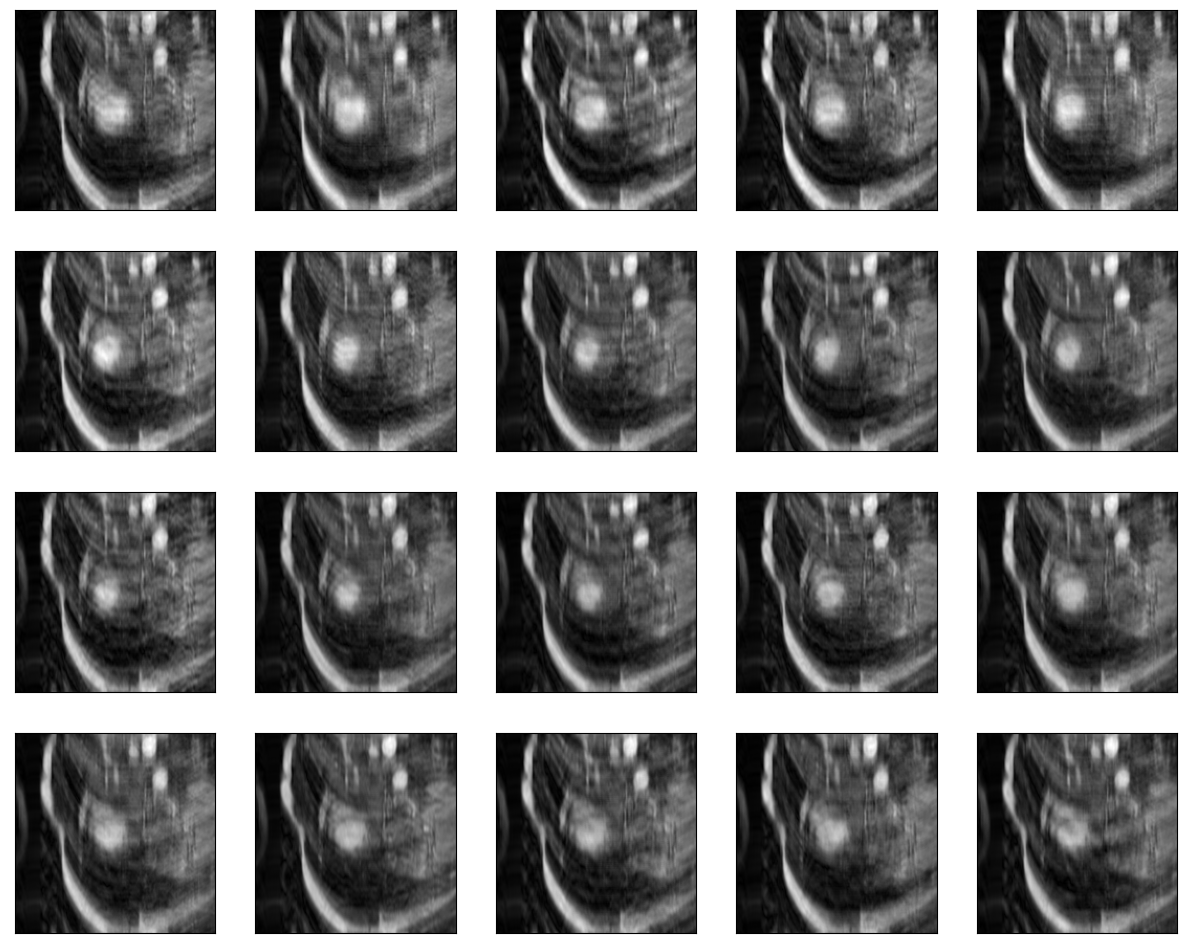

In [7]:
sampled_images = np.fft.ifft2(np.fft.ifftshift(sampled))
imsshow(np.abs(sampled_images), cmap='gray')

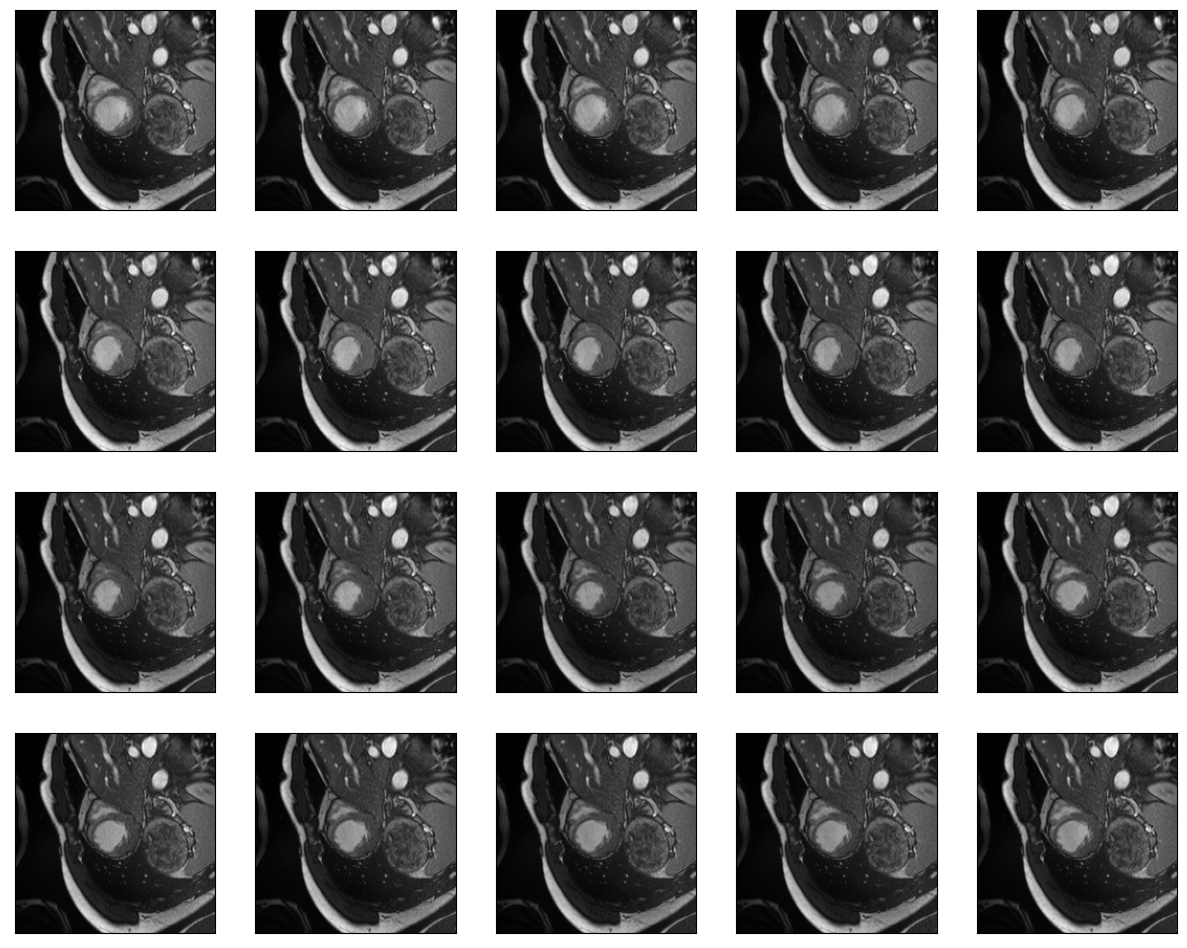

In [8]:
imsshow(images, cmap='gray')